In [ ]:
## Scaling configuration


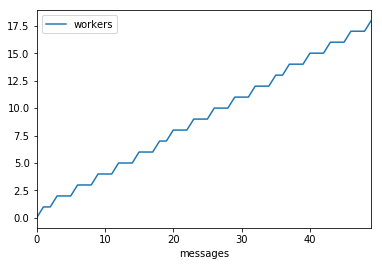

In [54]:
%matplotlib inline

import subprocess
import json
import os
import pandas


def calculate_scaling(scenarios, timeout=10):
    serialized = json.dumps(scenarios)
        
    args = ['./node_modules/.bin/coffee', 'scaletests.coffee']
    try:
        stdout = subprocess.check_output(args, input=serialized,
                                         encoding='utf-8', timeout=timeout, stderr=subprocess.STDOUT)
    except Exception as e:
        raise e

    try:
        results = json.loads(stdout)
    except Exception as e:
        print('Could not parse stdout', std)
    
    return results

def config(role='*', **kwargs):
    roleconfig = kwargs
    c = { role: roleconfig }
    return c


base = {
    'role': 'test',
    'config': config('test', minimum=0, maximum=20, processing=2, deadline=10),
    'messages': -1,
}

def merged_dict(a, b):
    d = a.copy()
    d.update(b)
    return d

messages = range(0, 50)
scenarios = [ merged_dict(base, { 'messages': m }) for m in messages ]

res = calculate_scaling(scenarios)

df = pandas.DataFrame({
    'messages': [s['messages'] for s in scenarios],
    'workers': [ r for r in res],
})
df.plot(x='messages')